In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np

%matplotlib ipympl
import matplotlib.pyplot as plt
from eomaps import MapsGrid, Maps


ERROR 1: PROJ: proj_create_from_database: Open of /home/linusrg/Code/LILI/.micromamba/envs/LILI-Env/share/proj failed
/home/linusrg/Code/LILI/.micromamba/envs/LILI-Env/lib/python3.10/site-packages/eomaps/eomaps.py:91: UserWarning: EOmaps disables matplotlib's interactive mode (e.g. 'plt.ioff()') when using the 'ipympl' backend to avoid recursions during callbacks!call `plt.show() to show the map!
  warnings.warn(


In [2]:
df = pd.read_csv('inno_geocoded.csv')
df = df.dropna(subset=['lng', 'lat'])
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.lng, df.lat), crs=4326)

/tmp/ipykernel_34733/2564041389.py:1: DtypeWarning: Columns (53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('inno_geocoded.csv')


In [3]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(12,9))
world.plot(ax=ax, alpha=0.4, color='grey')
gdf.plot(column='inno_nr', ax=ax, legend=True)
plt.title('LILIs')

Text(0.5, 1.0, 'LILIs')

## EOMaps

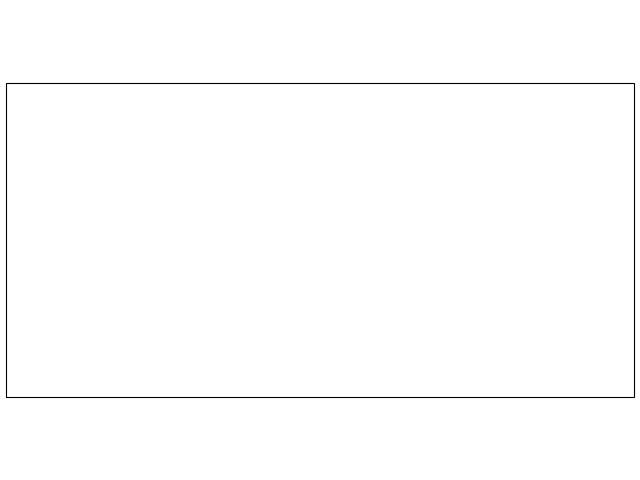

In [4]:
m = Maps(crs=4326)
m.add_feature.preset.ocean()
m.add_feature.preset.coastline()
m.add_gdf(gdf)

In [5]:
# just a helper-function to calculate axis-limits with a margin
def get_limits(data, margin=0.05):
    mi, ma = np.nanmin(data), np.nanmax(data)
    dm = margin * (ma - mi)
    return mi - dm, ma + dm


# ============== create a random database =============
length, Nlon, Nlat = 1000, 100, 50
lonmin, lonmax, latmin, latmax = -70, 175, 0, 75

database = np.full((Nlon * Nlat, length), np.nan)
for i in range(Nlon * Nlat):
    size = np.random.randint(1, length)
    x = np.random.normal(loc=np.random.rand(), scale=np.random.rand(), size=size)
    np.put(database, range(i * length, i * length + size), x)
lon, lat = np.meshgrid(
    np.linspace(lonmin, lonmax, Nlon), np.linspace(latmin, latmax, Nlat)
)

IDs = [f"point_{i}" for i in range(Nlon * Nlat)]
database = pd.DataFrame(database, index=IDs)
coords = pd.DataFrame(dict(lon=lon.flat, lat=lat.flat), index=IDs)

# -------- calculate the number of values in each dataset
#          (e.g. the data actually shown on the map)
data = pd.DataFrame(dict(count=database.count(axis=1), **coords))
# =====================================================

In [6]:
database

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
point_0,0.525019,0.911543,0.290152,0.704436,0.708222,0.503125,1.163217,0.684399,0.814219,0.235761,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
point_1,0.082009,0.455598,0.859760,1.393851,-0.862021,0.285511,-0.144514,1.280109,-0.002559,0.145517,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
point_2,-0.367255,1.038182,1.764708,-0.697577,1.624230,0.357053,1.064334,-0.701967,1.295238,1.525449,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
point_3,0.983269,0.769312,0.986606,0.723816,-0.455765,0.628213,0.552501,0.943824,0.758037,-1.109745,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
point_4,-0.176030,-0.440936,1.605027,1.979425,0.482467,0.668124,0.015320,2.172039,0.805008,-0.147726,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
point_4995,0.771900,0.614981,0.670938,0.768328,0.726092,0.623412,0.750527,0.713521,0.674191,0.690780,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
point_4996,0.012908,1.696809,0.572094,1.047410,2.426229,1.689228,0.589044,1.079725,1.867773,-0.023563,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
point_4997,0.300825,0.216332,0.301057,0.697713,0.246562,0.121234,-0.052169,0.719964,0.099351,1.052825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
point_4998,1.658685,-0.967580,0.556623,0.929823,0.721487,0.940553,0.549451,0.247988,1.361573,1.917110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.head(5)

,created_at,twitter_id,user_id,user_location,longitude,latitude,place_box_1_long,place_box_1_lat,place_box_2_long,place_box_2_lat,...,housenumber,quarter,suburb,allotments,farm,hamlet,isolated_dwelling,island,time,geometry
0,2012-01-01 08:10:59+00:00,153387731521773569,191216844,Paraguay,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"01/01/2012, 08:10:59",POINT (-58.16934 -23.31659)
2,2012-01-03 14:15:36+00:00,154204266041585664,298356610,bogota,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"03/01/2012, 14:15:36",POINT (-74.08365 4.65333)
3,2012-01-08 02:41:19+00:00,155841483243663360,285206171,Ibagué,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"08/01/2012, 02:41:19",POINT (-75.23272 4.47877)
4,2012-02-02 06:23:34+00:00,164957110965243904,141093464,"Santo Domingo, Rep. Dom.",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"02/02/2012, 06:23:34",POINT (-69.91443 18.51592)
5,2012-02-03 03:29:55+00:00,165275798348115970,60773078,somewhere,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"03/02/2012, 03:29:55",POINT (117.52952 34.44206)


In [8]:
data

,count,lon,lat
point_0,740,-70.000000,0.0
point_1,483,-67.525253,0.0
point_2,54,-65.050505,0.0
point_3,697,-62.575758,0.0
point_4,814,-60.101010,0.0
...,...,...,...
point_4995,380,165.101010,75.0
point_4996,202,167.575758,75.0
point_4997,161,170.050505,75.0
point_4998,950,172.525253,75.0


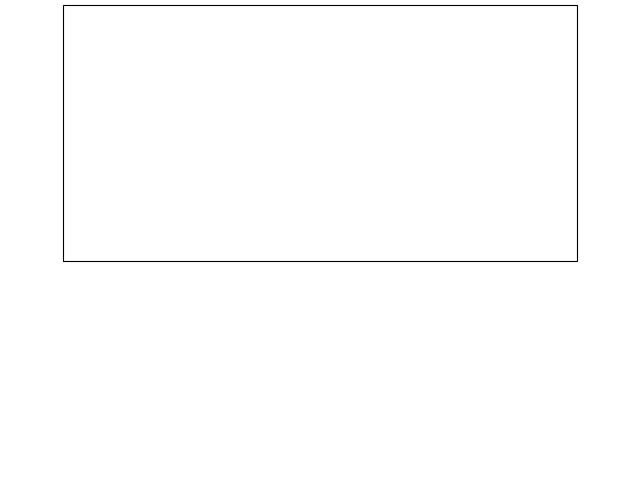

EOmaps: Parameter was set to: 'created_at'


TypeError: '>' not supported between instances of 'numpy.ndarray' and 'str'

In [9]:
# -------- initialize a MapsGrid with a map on top and 2 ordinary axes below
mg = MapsGrid(
    2,
    2,
    m_inits=dict(top=(0, slice(0, 2))),
    ax_inits=dict(left=(1, 0), right=(1, 1)),
    height_ratios=(3, 2),
)

mg.add_feature.preset.ocean()
mg.add_feature.preset.coastline()

# -------- set the specs for the Maps-object of the grid and plot the map
mg.m_top.set_data(data=df, x="lng", y="lat", crs=4326)
mg.m_top.set_classify_specs(
    scheme=Maps.CLASSIFIERS.UserDefined, bins=[50, 100, 200, 400, 800]
)
mg.m_top.set_shape.ellipses(radius=0.5)
mg.m_top.plot_map()

# -------- set some axis labels
mg.ax_left.set_ylabel("data-values")
mg.ax_left.set_xlabel("data-index")
mg.ax_right.set_ylabel("data-values")
mg.ax_right.set_xlabel("histogram count")

# -------- add the axes to the blit-manager so that their artists
#          as well as axis limits etc. are dynamically updated
mg.parent.BM.add_artist(mg.ax_left)
mg.parent.BM.add_artist(mg.ax_right)

# -------- define a custom callback function to update the plots
def update_plots(ID, **kwargs):
    # get the data
    x = database.loc[ID].dropna()

    # plot the lines and histograms
    (l,) = mg.ax_left.plot(x, lw=0.5, marker=".", c="C0")
    cnt, val, art = mg.ax_right.hist(
        x.values, bins=50, orientation="horizontal", fc="C0"
    )
    # add all artists as "temporary artists" so that they are removed
    # when the next datapoint is selected
    for a in [l, *art]:
        mg.m_top.cb.pick.add_temporary_artist(a)

    # manually set the axis limits (autoscaling not always works as expected)
    mg.ax_left.set_ylim(*get_limits(x))
    mg.ax_left.set_xlim(*get_limits(x.index))
    mg.ax_right.set_ylim(*get_limits(x))
    mg.ax_right.set_xlim(*get_limits(cnt))


# attach the custom callback (and some pre-defined)
mg.m_top.cb.pick.attach(update_plots)
mg.m_top.cb.pick.attach.annotate()
mg.m_top.cb.pick.attach.mark(permanent=False, buffer=1, fc="none", ec="r")
mg.m_top.cb.pick.attach.mark(permanent=False, buffer=2, fc="none", ec="r", ls=":")


# add a colorbar
mg.m_top.add_colorbar(0.25, left=0, right=0, label="Number of observations")
mg.m_top.figure.ax_cb_plot.tick_params(labelsize=6)

# update the padding for the axes
mg.gridspec.update(bottom=0.1, left=0.12, right=0.94, wspace=0.3, hspace=0.2)
